In [29]:
import pandas as pd
import numpy as np

In [30]:
stock=pd.read_csv("Google_stock.csv")
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...,...
3748,2024-11-22,165.850006,166.460007,163.899994,164.759995,164.759995,38604600
3749,2024-11-25,166.089996,168.630005,165.610001,167.649994,167.649994,33135300
3750,2024-11-26,167.630005,169.820007,167.580002,169.119995,169.119995,20486700
3751,2024-11-27,169.000000,169.479996,168.020004,169.229996,169.229996,19266500


In [31]:
sample3=stock.iloc[3691:3753]
sample3

,Date,Open,High,Low,Close,Adj Close,Volume
3691,2024-09-04,156.660004,159.000000,155.960007,156.449997,156.449997,19353800
3692,2024-09-05,156.300003,159.449997,155.979996,157.240005,157.240005,18688700
3693,2024-09-06,157.300003,157.830002,150.550003,150.919998,150.919998,37912100
3694,2024-09-09,152.509995,153.399994,147.220001,148.710007,148.710007,39260500
3695,2024-09-10,150.449997,151.270004,148.339996,148.660004,148.660004,31118800
...,...,...,...,...,...,...,...
3748,2024-11-22,165.850006,166.460007,163.899994,164.759995,164.759995,38604600
3749,2024-11-25,166.089996,168.630005,165.610001,167.649994,167.649994,33135300
3750,2024-11-26,167.630005,169.820007,167.580002,169.119995,169.119995,20486700
3751,2024-11-27,169.000000,169.479996,168.020004,169.229996,169.229996,19266500


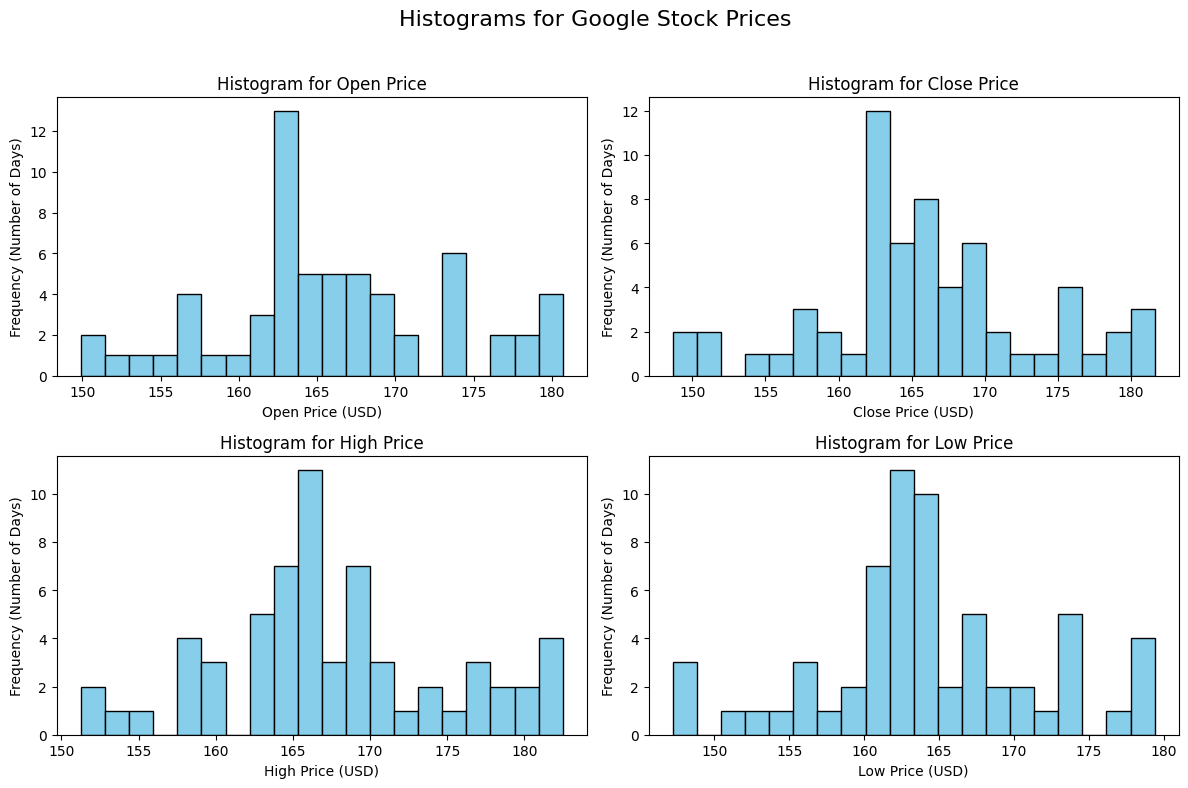

In [32]:
import matplotlib.pyplot as plt
columns = ["Open", "Close", "High", "Low"]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(columns):
    axes[i].hist(sample3[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram for {col} Price') 
    axes[i].set_xlabel(f'{col} Price (USD)')  
    axes[i].set_ylabel('Frequency (Number of Days)') 
plt.suptitle('Histograms for Google Stock Prices', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


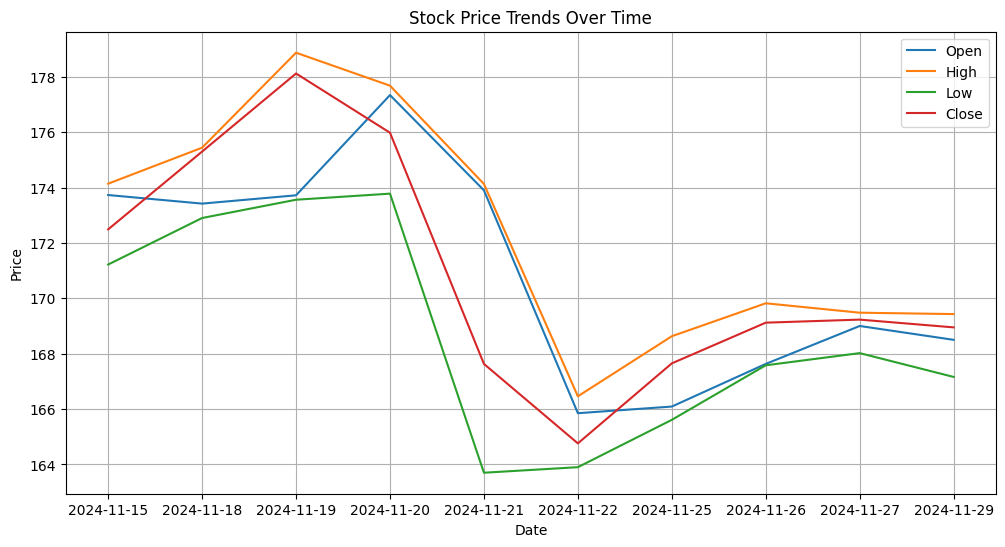

In [33]:
#Line Plot for Price Trends
sample3=sample3.iloc[-10:]
plt.figure(figsize=(12, 6))
for column in ['Open', 'High', 'Low', 'Close']:
    plt.plot(sample3['Date'], sample3[column], label=column)

plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


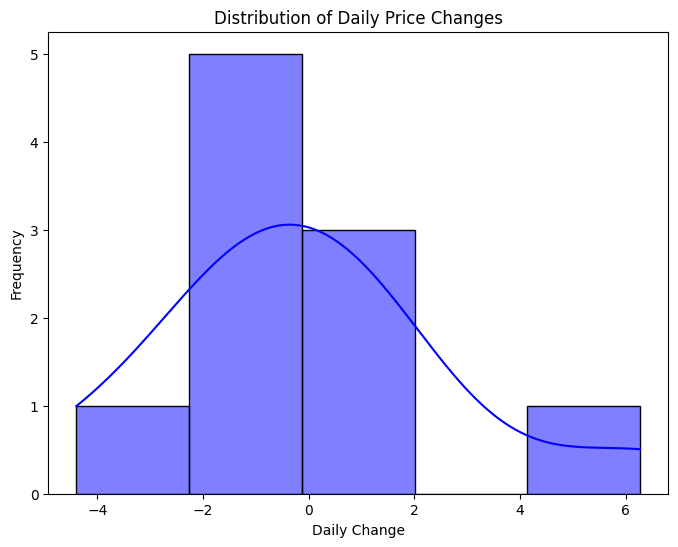

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sample3 is defined (e.g., from your Google_stock.csv dataset)
sample3 = sample3.iloc[-40:]
sample3['Daily Change'] = sample3['Open'] - sample3['Close']

# Histogram of daily price changes
plt.figure(figsize=(8, 6))
sns.histplot(sample3['Daily Change'], kde=True, color='blue')
plt.title('Distribution of Daily Price Changes')
plt.xlabel('Daily Change')
plt.ylabel('Frequency')
plt.show()

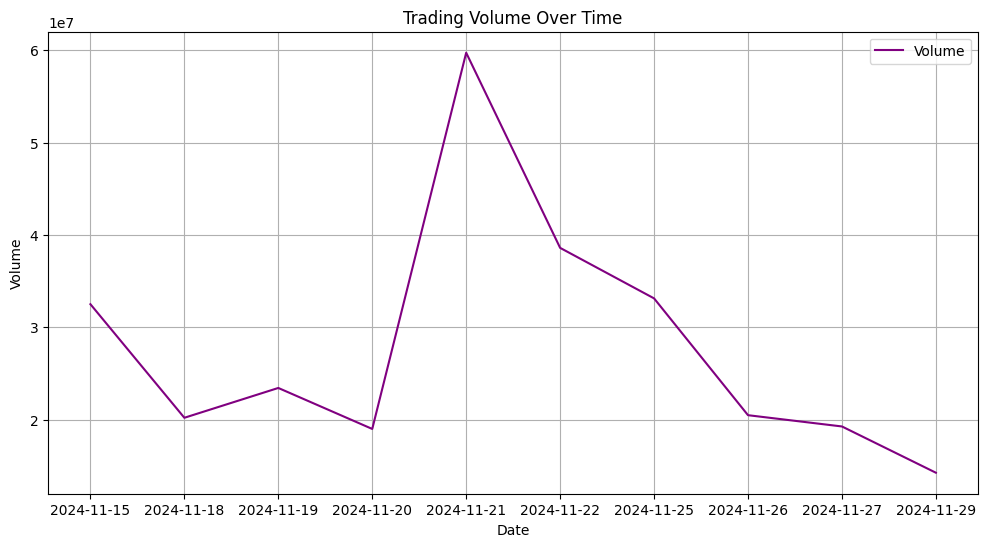

In [35]:
# Plot trading volume over time
#volume analysis
sample3=sample3.iloc[-30:]
plt.figure(figsize=(12, 6))
plt.plot(sample3['Date'], sample3['Volume'], color='purple', label='Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()
#Trading Volume:
#Average volume: 25.9 million shares
#Minimum volume: 14.1 million shares
#Maximum volume: 68.9 million shares


/var/folders/rp/cxr0h_0964d4dmrzwrqncphw0000gn/T/ipykernel_6359/1667879368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample3['EMA_20'] = sample3['Close'].ewm(span=20, adjust=False).mean()  # 20-day exponential moving average


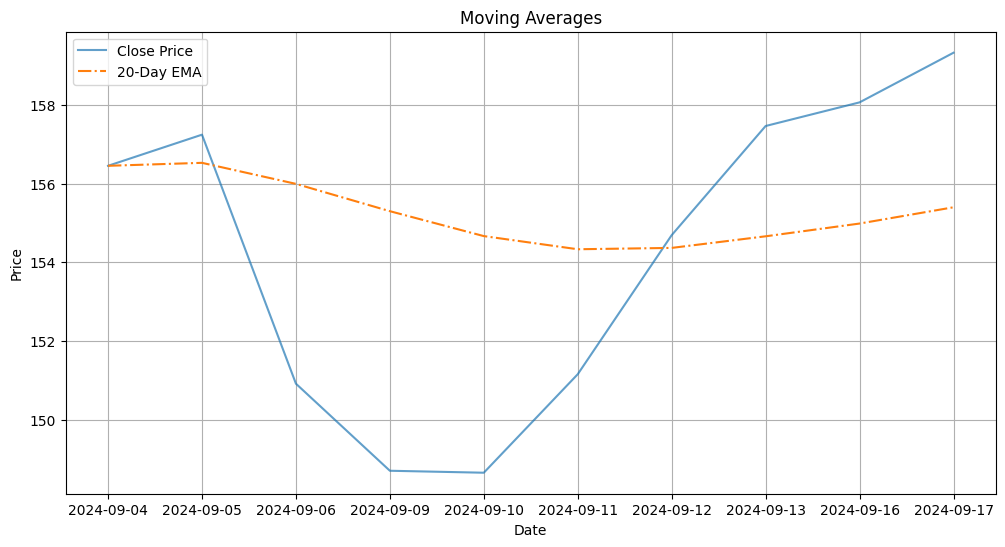

In [36]:
# Calculate moving averages
sample3=stock.iloc[3691:3701]
sample3['EMA_20'] = sample3['Close'].ewm(span=20, adjust=False).mean()  # 20-day exponential moving average

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(sample3['Date'], sample3['Close'], label='Close Price', alpha=0.7)
plt.plot(sample3['Date'], sample3['EMA_20'], label='20-Day EMA', linestyle='-.')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


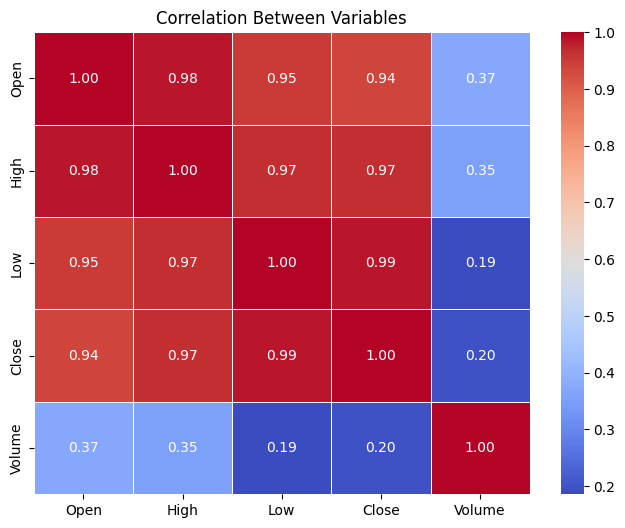

In [37]:
# Correlation heatmap
sample3=stock.iloc[3700:3750]
correlation = sample3[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Variables')
plt.show()


/var/folders/rp/cxr0h_0964d4dmrzwrqncphw0000gn/T/ipykernel_6359/3548991639.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price Type', y='Price', data=melted_data, palette='Set2')


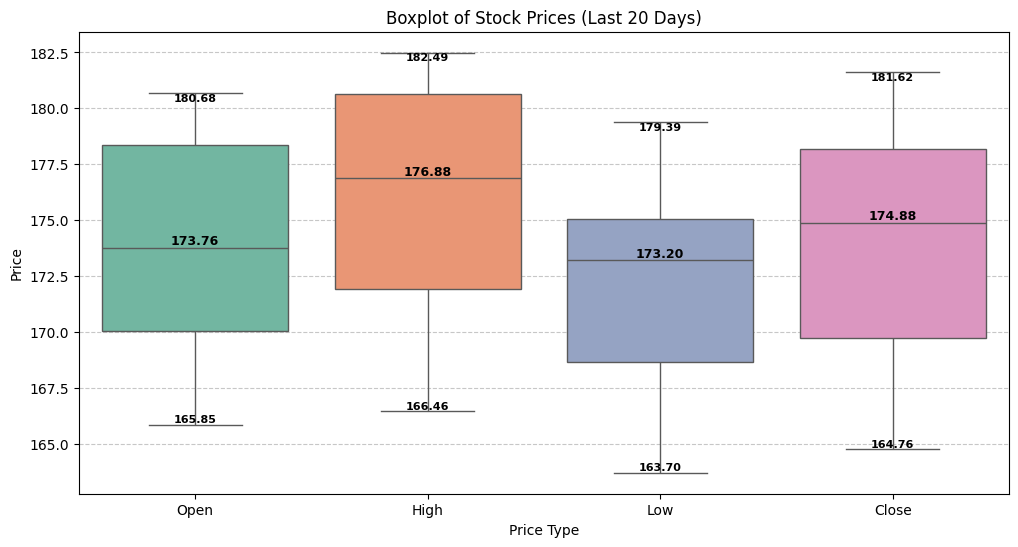

In [38]:
# Filter data for the last 20 days
last_20_days_data = sample3.tail(20)
import seaborn as sns
import matplotlib.pyplot as plt
melted_data = last_20_days_data[['Open', 'High', 'Low', 'Close']].melt(var_name='Price Type', value_name='Price')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price Type', y='Price', data=melted_data, palette='Set2')
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    median_val = last_20_days_data[col].median()
    min_val = last_20_days_data[col].min()
    max_val = last_20_days_data[col].max()

    plt.text(i, median_val, f'{median_val:.2f}', ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')
    plt.text(i, min_val, f'{min_val:.2f}', ha='center', va='bottom', fontsize=8, color='black',fontweight='bold')
    plt.text(i, max_val, f'{max_val:.2f}', ha='center', va='top', fontsize=8, color='black',fontweight='bold')

plt.title('Boxplot of Stock Prices (Last 20 Days)')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [39]:
print(sample3[["Open", "Close", "High", "Low"]].skew())
print(sample3[["Open", "Close", "High", "Low"]].kurt())


Open     0.784726
Close    0.869043
High     0.753617
Low      0.926472
dtype: float64
Open    -0.588721
Close   -0.424265
High    -0.718268
Low     -0.349094
dtype: float64


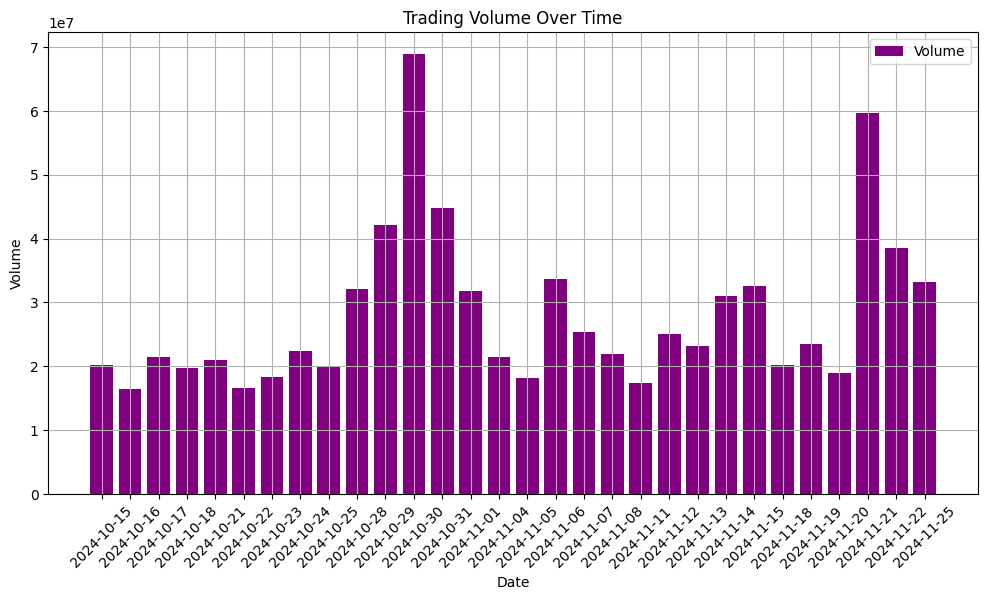

In [40]:
import matplotlib.pyplot as plt

sample3 = sample3.iloc[-30:]
plt.figure(figsize=(12, 6))
plt.bar(sample3['Date'], sample3['Volume'], color='purple', label='Volume')

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


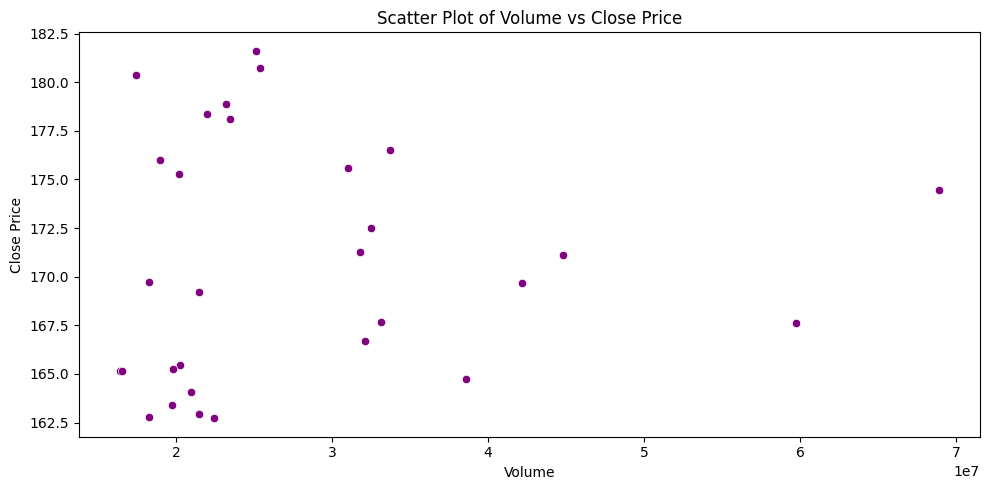

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sample_20 = sample3.iloc[:100]
plt.figure(figsize=(10, 5))
sns.scatterplot(x=sample_20['Volume'], y=sample_20['Close'], color='purple')
plt.title('Scatter Plot of Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()


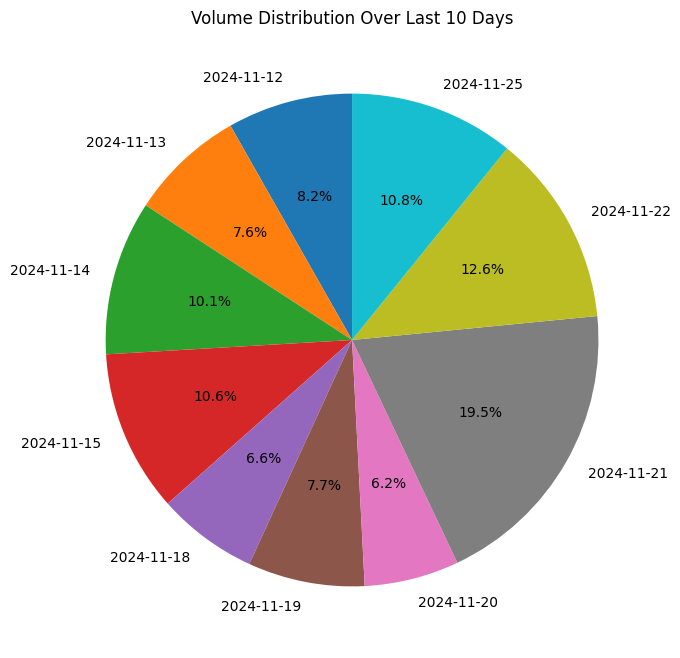

In [42]:
import matplotlib.pyplot as plt
sample3_last10 = sample3.tail(10)  
plt.figure(figsize=(8, 8))
plt.pie(sample3_last10['Volume'], labels=sample3_last10['Date'], autopct='%1.1f%%', startangle=90)
plt.title('Volume Distribution Over Last 10 Days')
plt.show()


In [43]:
sample3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,170.973332,172.607002,169.071999,170.772001,170.772001,2.799495e+07
std,6.171385,6.323336,5.925881,6.143125,6.143125,1.253584e+07
min,162.830002,163.330002,161.009995,162.720001,162.720001,1.640600e+07
25%,165.744995,166.392498,163.709999,165.187504,165.187504,1.992332e+07
50%,170.000000,171.525002,168.424995,169.709999,169.709999,2.279825e+07
75%,176.479996,178.535004,173.724998,175.879997,175.879997,3.241310e+07
max,180.679993,182.490005,179.389999,181.619995,181.619995,6.889080e+07


In [44]:
sample3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3720,2024-10-15,165.789993,167.679993,164.630005,165.460007,165.460007,20247200
3721,2024-10-16,164.529999,165.800003,163.740005,165.160004,165.160004,16406000
3722,2024-10-17,165.729996,166.369995,162.759995,162.929993,162.929993,21453400
3723,2024-10-18,163.190002,164.710007,163.080002,163.419998,163.419998,19757700
3724,2024-10-21,162.949997,164.500000,162.619995,164.070007,164.070007,20946500


In [45]:
sample3.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3745,2024-11-19,173.720001,178.869995,173.559998,178.119995,178.119995,23434900
3746,2024-11-20,177.339996,177.679993,173.779999,175.979996,175.979996,18997100
3747,2024-11-21,173.899994,174.130005,163.699997,167.630005,167.630005,59734400
3748,2024-11-22,165.850006,166.460007,163.899994,164.759995,164.759995,38604600
3749,2024-11-25,166.089996,168.630005,165.610001,167.649994,167.649994,33135300


In [46]:
sample3.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [47]:
duplicates = sample3.duplicated().sum()
print(duplicates)

0


In [48]:
sample3.drop(columns=['Date'], inplace=True)


In [49]:
sample3.mean()

Open         1.709733e+02
High         1.726070e+02
Low          1.690720e+02
Close        1.707720e+02
Adj Close    1.707720e+02
Volume       2.799495e+07
dtype: float64

In [50]:
sample3.median()

Open         1.700000e+02
High         1.715250e+02
Low          1.684250e+02
Close        1.697100e+02
Adj Close    1.697100e+02
Volume       2.279825e+07
dtype: float64